In [1]:
# Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score,f1_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier


In [3]:
# Data Source : You Tube

In [4]:
data_y = pd.read_csv("yt_sentiment_data_2019-2021.csv")
data_y.head(5)

,Unnamed: 0,date,username,nreplies,text,year,month,sentiment_score,sentiment_class,contain_mental_health,contain_covid,relevant
0,7,2019-02-01,LOW YIMIN,unknown,yes Moki right possibly Central Division okay ...,2019,2,1.0000,Very Positive,True,False,False
1,8,2019-02-02,Overthink,unknown,okay cool hi Tara years old anorexia nervosa s...,2019,2,0.9418,Very Positive,True,False,False
2,17,2019-03-07,Studytapioca,unknown,one window runs us bit Applause Applause Applause,2019,3,0.9988,Very Positive,True,False,False
3,18,2019-03-15,ZULA,unknown,hi name Jessica also known GBC welcome Zula pi...,2019,3,1.0000,Very Positive,True,False,False
4,27,2019-04-21,Dan Lok,unknown,gonna give multimillion dollar tip Thank love ...,2019,4,1.0000,Very Positive,True,False,False


In [5]:
# Dropping columns

In [6]:
data_y = data_y.drop("Unnamed: 0", axis = 1)

In [7]:
data_y.tail(5)

,date,username,nreplies,text,year,month,sentiment_score,sentiment_class,contain_mental_health,contain_covid,relevant
349,2021-07-06,Ministry of Sustainability and the Environment,unknown,mr speaker thank member question please allow ...,2021,7,0.9962,Very Positive,False,True,False
350,2021-07-06,Adrian Video Image,unknown,Got mailbox free oximeter Ã Â Collection perio...,2021,7,0.9963,Very Positive,True,True,True
351,2021-07-07,Piggypuggy,unknown,NaN,2021,7,0.0000,Neutral,False,False,False
352,2021-07-07,Dan PoliticsÃ¦ÂÂ¿Ã¥Â®Â¢Ã§ÂÂ½,unknown,oh man much complication going people taking m...,2021,7,0.9972,Very Positive,False,True,False
353,2021-07-08,USWATUN KH,unknown,viewers come back nasana deliver latest trendl...,2021,7,0.7430,Very Positive,True,True,True


In [8]:
# Renaming the columns

In [9]:
data_y = data_y.rename({"relevant":"relevance"}, axis=1)

In [10]:
data_y.head()

,date,username,nreplies,text,year,month,sentiment_score,sentiment_class,contain_mental_health,contain_covid,relevance
0,2019-02-01,LOW YIMIN,unknown,yes Moki right possibly Central Division okay ...,2019,2,1.0000,Very Positive,True,False,False
1,2019-02-02,Overthink,unknown,okay cool hi Tara years old anorexia nervosa s...,2019,2,0.9418,Very Positive,True,False,False
2,2019-03-07,Studytapioca,unknown,one window runs us bit Applause Applause Applause,2019,3,0.9988,Very Positive,True,False,False
3,2019-03-15,ZULA,unknown,hi name Jessica also known GBC welcome Zula pi...,2019,3,1.0000,Very Positive,True,False,False
4,2019-04-21,Dan Lok,unknown,gonna give multimillion dollar tip Thank love ...,2019,4,1.0000,Very Positive,True,False,False


In [11]:
data_y.shape

(354, 11)

In [12]:
percent_missing = data_y.isnull().sum() * 100 / len(data_y)
missing_value_df = pd.DataFrame({'column_name': data_y.columns,
                                 'percent_missing': percent_missing})

In [13]:
missing_value_df

,column_name,percent_missing
date,date,0.000000
username,username,0.000000
nreplies,nreplies,0.000000
text,text,2.824859
year,year,0.000000
month,month,0.000000
sentiment_score,sentiment_score,0.000000
sentiment_class,sentiment_class,0.000000
contain_mental_health,contain_mental_health,0.000000
contain_covid,contain_covid,0.000000


In [14]:
data_y.dropna(inplace=True)

In [15]:
data_y.isnull().sum()

date                     0
username                 0
nreplies                 0
text                     0
year                     0
month                    0
sentiment_score          0
sentiment_class          0
contain_mental_health    0
contain_covid            0
relevance                0
dtype: int64

In [16]:
data_y.shape

(344, 11)

In [17]:
data_y = data_y.reset_index()

In [18]:
# Feature Extraction

In [20]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

count = CountVectorizer(binary = True)
bow = count.fit_transform(data_y['sentiment_class'].values)

data_1 = pd.DataFrame(bow.toarray(), columns = count.get_feature_names())
data_1

,negative,neutral,positive,positve,very
0,0,0,1,0,1
1,0,0,1,0,1
2,0,0,1,0,1
3,0,0,1,0,1
4,0,0,1,0,1
...,...,...,...,...,...
339,0,0,1,0,1
340,0,0,1,0,1
341,0,0,1,0,1
342,0,0,1,0,1


In [21]:
data_1 = data_1.reset_index()
data_1

,index,negative,neutral,positive,positve,very
0,0,0,0,1,0,1
1,1,0,0,1,0,1
2,2,0,0,1,0,1
3,3,0,0,1,0,1
4,4,0,0,1,0,1
...,...,...,...,...,...,...
339,339,0,0,1,0,1
340,340,0,0,1,0,1
341,341,0,0,1,0,1
342,342,0,0,1,0,1


In [22]:
data = pd.concat([data_y,data_1], axis=1)
data.head()

,index,date,username,nreplies,text,year,month,sentiment_score,sentiment_class,contain_mental_health,contain_covid,relevance,index,negative,neutral,positive,positve,very
0,0,2019-02-01,LOW YIMIN,unknown,yes Moki right possibly Central Division okay ...,2019,2,1.0000,Very Positive,True,False,False,0,0,0,1,0,1
1,1,2019-02-02,Overthink,unknown,okay cool hi Tara years old anorexia nervosa s...,2019,2,0.9418,Very Positive,True,False,False,1,0,0,1,0,1
2,2,2019-03-07,Studytapioca,unknown,one window runs us bit Applause Applause Applause,2019,3,0.9988,Very Positive,True,False,False,2,0,0,1,0,1
3,3,2019-03-15,ZULA,unknown,hi name Jessica also known GBC welcome Zula pi...,2019,3,1.0000,Very Positive,True,False,False,3,0,0,1,0,1
4,4,2019-04-21,Dan Lok,unknown,gonna give multimillion dollar tip Thank love ...,2019,4,1.0000,Very Positive,True,False,False,4,0,0,1,0,1


In [23]:
data = data.drop(["text","nreplies"], axis = 1)

In [24]:
# Multilabel Encoding

In [25]:
categorical_columns = list(data.loc[:, data.dtypes =="object"].columns)
categorical_columns

['date', 'username', 'sentiment_class']

In [26]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

def MultiLabelEncoder(columnlist,dataframe):
    for i in columnlist:
        #print(i)
        labelencoder_X=LabelEncoder()
        dataframe[i]=labelencoder_X.fit_transform(dataframe[i])

MultiLabelEncoder(categorical_columns, data)

In [27]:
data.head()

,index,date,username,year,month,sentiment_score,sentiment_class,contain_mental_health,contain_covid,relevance,index,negative,neutral,positive,positve,very
0,0,0,116,2019,2,1.0000,4,True,False,False,0,0,0,1,0,1
1,1,1,149,2019,2,0.9418,4,True,False,False,1,0,0,1,0,1
2,2,2,189,2019,3,0.9988,4,True,False,False,2,0,0,1,0,1
3,3,3,220,2019,3,1.0000,4,True,False,False,3,0,0,1,0,1
4,4,4,45,2019,4,1.0000,4,True,False,False,4,0,0,1,0,1


In [28]:
# Target Variable

In [29]:
data["has_mental_impact"] = np.where((data['negative']== 1) & (data['relevance']==1) ,1,0)

In [30]:
data.head()

,index,date,username,year,month,sentiment_score,sentiment_class,contain_mental_health,contain_covid,relevance,index,negative,neutral,positive,positve,very,has_mental_impact
0,0,0,116,2019,2,1.0000,4,True,False,False,0,0,0,1,0,1,0
1,1,1,149,2019,2,0.9418,4,True,False,False,1,0,0,1,0,1,0
2,2,2,189,2019,3,0.9988,4,True,False,False,2,0,0,1,0,1,0
3,3,3,220,2019,3,1.0000,4,True,False,False,3,0,0,1,0,1,0
4,4,4,45,2019,4,1.0000,4,True,False,False,4,0,0,1,0,1,0


In [31]:
data["has_mental_impact"].value_counts()

0    340
1      4
Name: has_mental_impact, dtype: int64

In [32]:
data.isnull().sum()

index                    0
date                     0
username                 0
year                     0
month                    0
sentiment_score          0
sentiment_class          0
contain_mental_health    0
contain_covid            0
relevance                0
index                    0
negative                 0
neutral                  0
positive                 0
positve                  0
very                     0
has_mental_impact        0
dtype: int64

In [33]:
data["username"].count()

344

In [34]:
data = data.drop("index", axis =1)

In [35]:
# Train_Test Split

In [36]:
y = data["has_mental_impact"]
X = data.drop("has_mental_impact", axis = 1)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state  = 42)

In [38]:
X_train.head(5)

,date,username,year,month,sentiment_score,sentiment_class,contain_mental_health,contain_covid,relevance,negative,neutral,positive,positve,very
17,17,169,2019,10,0.9976,4,True,False,False,0,0,1,0,1
24,24,65,2020,1,0.9912,4,True,False,False,0,0,1,0,1
238,177,190,2021,1,0.9998,4,True,True,True,0,0,1,0,1
145,102,55,2020,7,0.9999,4,True,False,False,0,0,1,0,1
209,151,206,2020,11,0.9999,4,False,False,False,0,0,1,0,1


In [39]:
y_train.head()

17     0
24     0
238    0
145    0
209    0
Name: has_mental_impact, dtype: int32

In [40]:
X_test.head()

,date,username,year,month,sentiment_score,sentiment_class,contain_mental_health,contain_covid,relevance,negative,neutral,positive,positve,very
194,138,113,2020,9,0.9995,4,True,False,False,0,0,1,0,1
157,112,178,2020,7,0.9991,4,True,True,True,0,0,1,0,1
225,165,134,2020,12,0.9981,4,True,False,False,0,0,1,0,1
208,150,244,2020,11,-0.9997,3,True,False,False,1,0,0,0,1
318,233,14,2021,6,0.9880,4,True,False,False,0,0,1,0,1


In [41]:
y_test.head()

194    0
157    0
225    0
208    0
318    0
Name: has_mental_impact, dtype: int32

In [42]:
# Standardization of the data

In [43]:
scale = StandardScaler()
features = X_train.columns
X_train = scale.fit_transform(X_train[features])

X_test = scale.transform(X_test)

In [44]:
#Logistic Regression Classifier

In [45]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [46]:
#Checking Accuracy Score

In [47]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 1.00


In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[85  0]
 [ 0  1]]


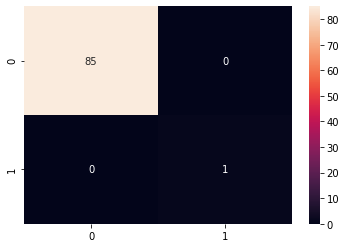

In [49]:
sns.heatmap(confusion_matrix,annot=True)

In [50]:
#Checking Classification Report

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00         1

    accuracy                           1.00        86
   macro avg       1.00      1.00      1.00        86
weighted avg       1.00      1.00      1.00        86



In [52]:
# ROC auc_score & curve

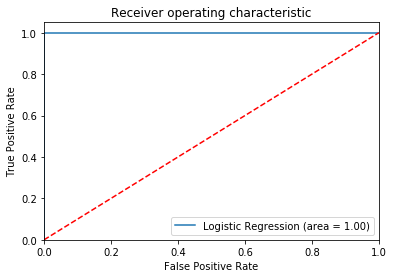

In [53]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()